In [1]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# useful command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-darkgrid')

# **Leitura dos arquivos**


In [2]:
df_ratings = pd.read_csv('/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/ratings.dat', sep='::', names = ['userId', 'movieId', 'rating', 'timestamp'])
df_movies  = pd.read_csv('/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/movies.dat', sep='::',  names = ['movieId', 'title', 'genres'] , encoding='latin-1')
df_users = pd.read_csv('/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/users.dat', sep='::', names = ['userId', 'gender', 'age', 'occupation', 'zip-code'])
df_test = pd.read_csv('/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/testSet.txt', sep='::', names=['userId', 'itemId', 'rating'])

In [3]:
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userId      6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
df_users.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
nb_users = len(df_ratings['userId'].unique())
nb_itens = len (df_ratings['movieId'].unique())
nb_ratings = len (df_ratings['rating'])
sparsity = 1 - (nb_ratings)/float (nb_users*nb_itens)
print ("Basic Overview:")
print (" - Nb of users:", nb_users)
print (" - Nb of items:", nb_itens)
print (" - Nb of rating:", nb_ratings)
print (" - Data sparsity:", sparsity)



Basic Overview:
 - Nb of users: 6040
 - Nb of items: 3706
 - Nb of rating: 1000209
 - Data sparsity: 0.9553163743776871


Users Consumption Historic

In [8]:
items_consumed_by_user = df_ratings.groupby('userId')['movieId'].apply(list)

In [9]:
items_consumed_by_user [:5]

userId
1    [1193, 661, 914, 3408, 2355, 1197, 1287, 2804,...
2    [1357, 3068, 1537, 647, 2194, 648, 2268, 2628,...
3    [3421, 1641, 648, 1394, 3534, 104, 2735, 1210,...
4    [3468, 1210, 2951, 1214, 1036, 260, 2028, 480,...
5    [2987, 2333, 1175, 39, 288, 2337, 1535, 1392, ...
Name: movieId, dtype: object

In [10]:
users_historic = {}
for userId in df_ratings['userId'].unique():
    users_historic[userId] = len (items_consumed_by_user[userId][:])




Text(0.5, 1.0, 'Grafico Cauda Longa')

Text(0, 0.5, 'Quantidade de Filmes Assistidos')

Text(0.5, 0, 'Assinantes')

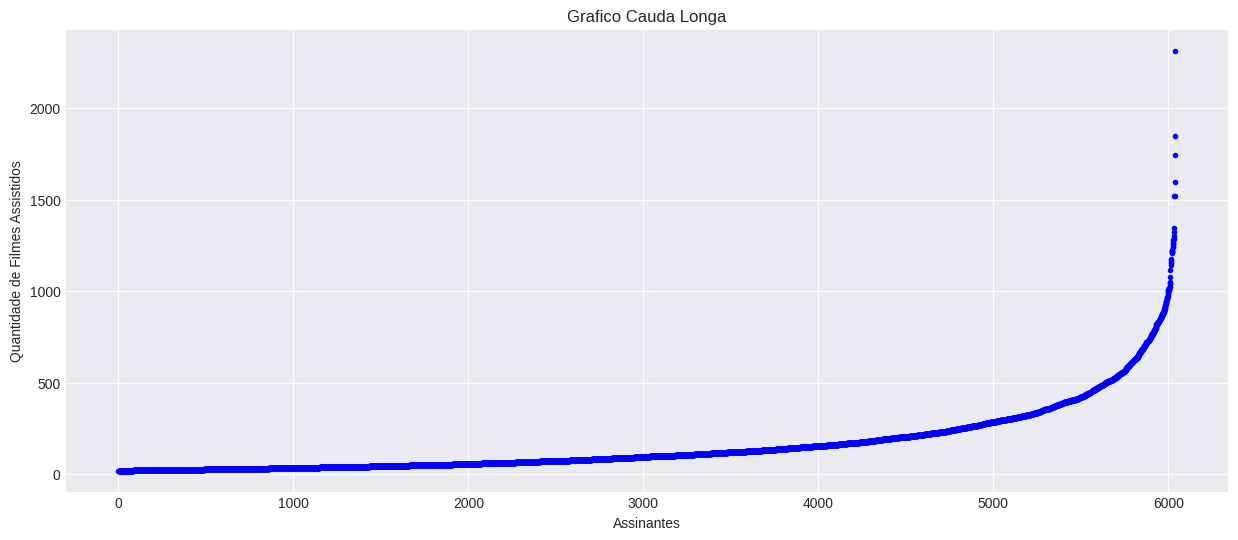

In [11]:
distribution = list (users_historic.values())
distribution.sort()
plt.plot(distribution, '.', color='blue')
plt.title ("Grafico Cauda Longa")
plt.ylabel ('Quantidade de Filmes Assistidos')
plt.xlabel ('Assinantes')
plt.show()

In [12]:
nota_consumed_by_user = df_ratings.groupby('userId')['rating'].apply(list)

In [13]:
nota_consumed_by_user [:5]

userId
1    [5, 3, 3, 4, 5, 3, 5, 5, 4, 4, 5, 4, 4, 4, 5, ...
2    [5, 4, 4, 3, 4, 4, 5, 3, 3, 3, 5, 4, 3, 3, 2, ...
3    [4, 2, 3, 4, 3, 4, 4, 4, 3, 3, 5, 3, 5, 4, 5, ...
4    [5, 3, 4, 4, 4, 5, 5, 4, 2, 5, 5, 4, 4, 4, 4, ...
5    [4, 4, 5, 3, 2, 5, 4, 4, 2, 3, 2, 3, 4, 3, 1, ...
Name: rating, dtype: object

In [14]:
users_historic_nota = {}
for userId in df_ratings['userId'].unique():
    users_historic_nota[userId] = len(nota_consumed_by_user[userId][:])


Text(0.5, 1.0, 'Analisando a avaliação')

<Axes: title={'center': 'Analisando a avaliação'}, xlabel='rating'>

Text(0.5, 0, 'Notas')

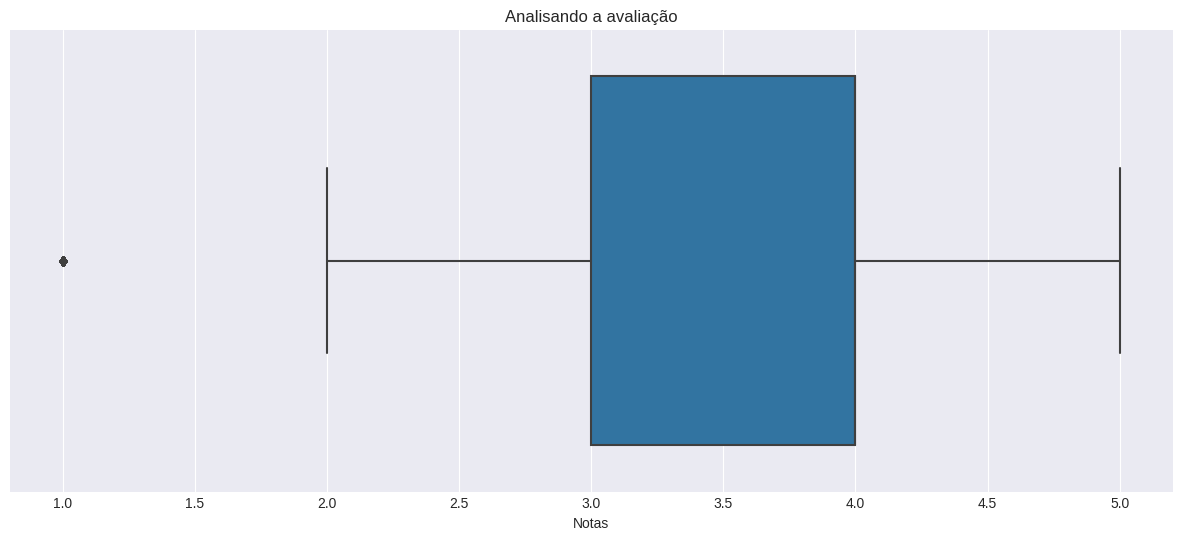

In [15]:
plt.title ('Analisando a avaliação')
sns.boxplot(df_ratings, x='rating' )
plt.xlabel('Notas')
plt.show()

In [16]:
df_ratings['rating'].describe()


count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x7b019c2f4880>,
 [Text(0.0, 0, '1'),
  Text(1.0, 0, '2'),
  Text(2.0, 0, '3'),
  Text(3.0, 0, '4'),
  Text(4.0, 0, '5')])

Text(0, 0.5, 'Quantidade de Avaliações')

Text(0.5, 0, 'Notas')

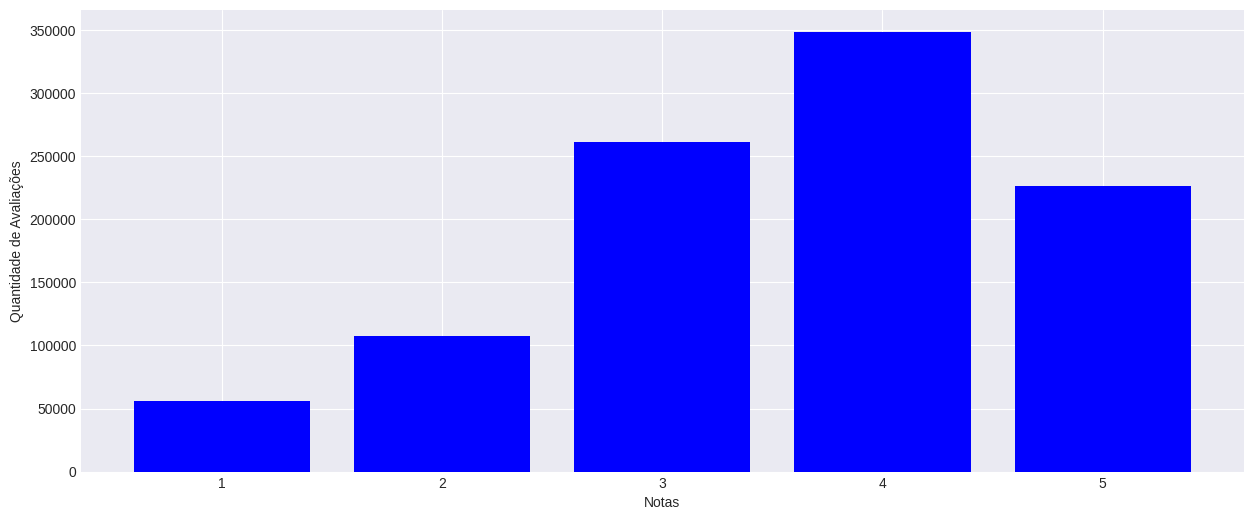

In [17]:
notas = ['1', '2', '3', '4', '5']
qtd_avaliacao = [len(df_ratings.loc[(df_ratings['rating']== 1)]), len(df_ratings.loc[(df_ratings['rating']== 2)]), len(df_ratings.loc[(df_ratings['rating']== 3)]), len(df_ratings.loc[(df_ratings['rating']== 4)]), len(df_ratings.loc[(df_ratings['rating']== 5)])]
plt.bar(notas, qtd_avaliacao , color= "blue")
plt.xticks(notas)
plt.ylabel('Quantidade de Avaliações')
plt.xlabel('Notas')
plt.show()

# **Sistema Recomendação KNN**

In [18]:
Tab_Cruzada = df_movies.merge (df_ratings, how='inner', on='movieId')

In [19]:
Tab_Cruzada = Tab_Cruzada.merge (df_users, how='inner', on='userId')

In [20]:
Tab_Cruzada.isnull().sum()

movieId       0
title         0
genres        0
userId        0
rating        0
timestamp     0
gender        0
age           0
occupation    0
zip-code      0
dtype: int64

In [21]:
Tab_Cruzada.nunique()

movieId         3706
title           3706
genres           301
userId          6040
rating             5
timestamp     458455
gender             2
age                7
occupation        21
zip-code        3439
dtype: int64

In [22]:
Tab_Cruzada.describe()

,movieId,userId,rating,timestamp,age,occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [23]:
Analise = Tab_Cruzada.groupby ( by=['title']).agg (
Quantidade= ('title', 'count'),
Media= ('rating', 'mean'),
Max= ('rating', 'max'),
Min= ('rating', 'min'),
Mediana = ('rating', 'median'),
)

In [24]:
Analise.head()

,Quantidade,Media,Max,Min,Mediana
title,,,,,
"$1,000,000 Duck (1971)",37,3.027027,5,1,3.0
'Night Mother (1986),70,3.371429,5,1,3.0
'Til There Was You (1997),52,2.692308,5,1,3.0
"'burbs, The (1989)",303,2.910891,5,1,3.0
...And Justice for All (1979),199,3.713568,5,1,4.0


In [25]:
#Verificar a quantidade de Livros mais avaliados
Analise.sort_values(['Media','Quantidade'], ascending=False).head()

,Quantidade,Media,Max,Min,Mediana
title,,,,,
"Gate of Heavenly Peace, The (1995)",3,5.0,5,5,5.0
Smashing Time (1967),2,5.0,5,5,5.0
"Baby, The (1973)",1,5.0,5,5,5.0
Bittersweet Motel (2000),1,5.0,5,5,5.0
Follow the Bitch (1998),1,5.0,5,5,5.0


In [26]:
px.scatter(
 # Dados
 Analise,
 x='Quantidade', y='Media',
 title='Média x Quantidade - Títulos'
)

In [27]:
Analise['Quantidade'].describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: Quantidade, dtype: float64

In [28]:
Avaliacoes = Analise.reset_index().iloc[:,0:2]
Tab_Final = Tab_Cruzada.merge(Avaliacoes, how='inner', on='title')

In [29]:
Tab_Final.head()

,movieId,title,genres,userId,rating,timestamp,gender,age,occupation,zip-code,Quantidade
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,2077
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117,2077
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413,2077
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614,2077
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370,2077


In [30]:
Filmes_Avaliados= Tab_Final.loc[ (Tab_Final['Quantidade']>= 50)]
Filmes_Avaliados.shape

(977839, 11)

In [31]:
Filmes_Avaliados.duplicated().sum()

0

In [32]:
Filmes_Avaliados.head()

,movieId,title,genres,userId,rating,timestamp,gender,age,occupation,zip-code,Quantidade
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,2077
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117,2077
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413,2077
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614,2077
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370,2077


# Gerar matriz


In [33]:
Matriz = Filmes_Avaliados.pivot_table (values='rating', index='title', columns='userId')


In [34]:
Matriz.fillna (0, inplace= True)
Matriz.head()

userId,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
title,,,,,,,,,,,,,,,,,,,,,
'Night Mother (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [35]:

from scipy.sparse import csc_matrix
Matriz_Sparse = csc_matrix(Matriz)



In [36]:
start = time.time()

In [37]:
from sklearn.neighbors import NearestNeighbors
Modelo = NearestNeighbors (
    n_neighbors= 10,
    algorithm='brute',
     metric='minkowski' )

Modelo.fit(Matriz_Sparse)


NearestNeighbors(algorithm='brute', n_neighbors=10)

In [38]:
end = time.time()
print(end - start)

5.865941524505615


In [ ]:
for Posicao, title in enumerate (Matriz.index):
 print (Posicao, title)

In [42]:
# Todas as predições de todos os filmes

Selecionar_Filme = Matriz.iloc[213, :].values.reshape(1, -1)
Distancia, Recomendacao = Modelo.kneighbors(Selecionar_Filme)
for Loop in range (len(Recomendacao)):
  print (Matriz.index[Recomendacao[Loop]])



Index(['Battlefield Earth (2000)', 'Iron Eagle IV (1995)', 'Steel (1997)',
       'Puppet Master 5: The Final Chapter (1994)', 'Bats (1999)',
       'Universal Soldier: The Return (1999)', 'Meatballs III (1987)',
       'King Kong Lives (1986)',
       'Children of the Corn II: The Final Sacrifice (1993)',
       'Toxic Avenger Part III: The Last Temptation of Toxie, The (1989)'],
      dtype='object', name='title')


In [51]:
def readRecommendation(file_name):

    recommendations = {}
    file_in = open(file_name, 'r')

    # for each line
    for row in file_in:
        row = row.rstrip()
        # extracting userId
        values = row.split("\t")
        userId = int(values[0])
        recommendations[userId] = []
        # extracting items
        values[1] = values[1].replace('[','')
        values[1] = values[1].replace(']','')
        recList = values[1].split(',')
        # saving items
        for tupla in recList:
            v = tupla.split(':')
            recommendations[userId].append(int(v[0]))

    file_in.close()

    return recommendations

In [54]:

def dumpRecommendation(recommendation, users_targets, file_name):

    file_out = open(file_name, 'w')

    # for each user target
    for userId in users_targets:
        issuedItems = ""
        # for each item in the previous order
        for itemId in recommendation[userId]:
            issuedItems += str(itemId) + ":" + str(0.0) + ","
        # saving in file in correct format
        string_s = str(userId) + "\t" + "[" + issuedItems
        string_out = string_s[:-1] + ']'
        file_out.write(string_out + "\n")

    file_out.close()




In [ ]:
# Save in a file
users_targets = df_test['userId'].unique()
dumpRecommendation(Recomendacao, users_targets, "/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/recList_KNN.txt")

# PureSVD




In [77]:
import operator
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from collections import OrderedDict
from scipy.sparse import linalg

# useful command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams.update({'font.size': 14})

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df_train = pd.read_csv('/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/trainSet.txt', sep='::', names=['userId', 'itemId', 'rating', 'timestamp'])
df_test = pd.read_csv('/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/testSet.txt', sep='::', names=['userId', 'itemId', 'rating', 'timestamp'])

df_train.head()
df_test.head()

,userId,itemId,rating,timestamp
0,1,1193,5.0,978300760.0
1,1,661,3.0,978302109.0
2,1,914,3.0,978301968.0
3,1,3408,4.0,978300275.0
4,1,1197,3.0,978302268.0


,userId,itemId,rating,timestamp
0,1,2355,5.0,978824291.0
1,1,595,5.0,978824268.0
2,1,2687,3.0,978824268.0
3,1,48,5.0,978824351.0
4,1,745,3.0,978824268.0


In [80]:
# Select users, items and ratings logs (i.e., all information from each column)
users = df_train['userId']
items = df_train['itemId']
ratings = df_train['rating']

In [81]:
nb_users = max(users)
nb_items = max(items)

In [91]:
# Creating matrix of ratings
ratings_matrix = csr_matrix((ratings, (users, items)), shape=(nb_users+1, nb_items+1))

ratings_matrix.shape

(6041, 3953)

In PureSVD model, the prediction is based on the latent factors extracted via SVD.

- Let a ratings matrix, we apply the SVD to extract three matrices:
    - *U* represents the users factors *(m x f)*
    - *S* the eigenvalues associated to each eigenvector *(f x f)*
    - *Q* represents the items factors *(f x n)*


- The prediction is similar to:
$
\begin{align}
\widehat{r}_{ui} = r_u \cdot Q^T \cdot q_i
\end{align}
$

In [92]:
start = time.time()

In [93]:
numFactors = 10

In [94]:
[U, S, Q] = scipy.sparse.linalg.svds(ratings_matrix, numFactors, return_singular_vectors=True)
prediction_matrix = csr_matrix((nb_users+1, nb_items+1))


In [95]:
# # Realize a prediction for each user Optimized way
prediction_matrix = csr_matrix((nb_users+1, nb_items+1))

Q_t = Q.transpose()

aux_matrix = ratings_matrix.dot(Q_t)
prediction_matrix = aux_matrix.dot(Q)

In [96]:
# Size of each recommendation
top_k = 10


In [97]:
# Setting the recommendations for each user
recommendation = {}

for u in range(ratings_matrix.shape[0]):
    recommendation[u] = []
    cont = 0
    # sorting items by relevance
    order = np.argsort(prediction_matrix[u,:])[::-1]
    # recommending the best items that have never seen by users
    for i in order:
        # recommending the top-k items
        if (cont < top_k):
            if (ratings_matrix[u,i] == 0):
                recommendation[u].append(i)
                cont += 1
        else:
            break

In [98]:
end = time.time()
print(end - start)

27.149978399276733


In [ ]:
# Save in a file
users_targets = df_test['userId'].unique()
dumpRecommendation(recommendation, users_targets, "/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/recList_PureSVD.txt")

**Avaliação dos modelos**


In [62]:
# Select users, items and ratings logs (i.e., all information from each column)
df_train = pd.read_csv('/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/trainSet.txt', sep='::', names=['userId', 'itemId', 'rating', 'timestamp'])

df_test = pd.read_csv('/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/testSet.txt', sep='::', names=['userId', 'itemId', 'rating', 'timestamp'])

users = df_train['userId']
items = df_train['itemId']
ratings = df_train['rating']

nb_users = max(users)
nb_items = max(items)

train_matrix = csr_matrix((ratings, (users, items)), shape=(nb_users+1, nb_items+1))

users = df_test['userId']
items = df_test['itemId']
ratings = df_test['rating']

test_matrix = csr_matrix((ratings, (users, items)), shape=(nb_users+1, nb_items+1))


In [63]:
rec_KNN = readRecommendation("/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/recList_KNN.txt")
rec_PureSVD = readRecommendation("/content/drive/MyDrive/EspecializacaoPUC/Dataset/Dataset/ML-1M/recList_PureSVD.txt")

In [64]:
def metric_hitRate(users_targets, test_matrix, recommendation):

    hitRate = {}

    for u in users_targets:
        # items consumed by u in test set
        items_consumed = list (np.nonzero(test_matrix[u,:])[1] )
        # hits represented by intersection
        hits = set(recommendation[u]).intersection (set(items_consumed))
        # saving
        hitRate[u] = len(hits)

    return hitRate

In [65]:
def metric_precision_recall(users_targets, test_matrix, recommendation):

    precision = {}
    recall = {}

    for u in users_targets:
        # items consumed by u in test set
        items_consumed = list (np.nonzero(test_matrix[u,:])[1] )
        # measuring u's average rating
        mean_rating = np.sum (test_matrix[u, :]) / float(len(items_consumed))
        # selecting relevant items for u
        relevants = []
        for i in items_consumed:
            if (test_matrix[u,i] >= mean_rating):
                relevants.append(i)
        # relevants INT retrieved
        inter = set(recommendation[u]).intersection (set(relevants))
        # measuring precision
        precision[u] = len(inter)/float(len(recommendation[u]))
        # measuring recall
        recall[u] = len(inter)/float(len(relevants))

    return precision, recall

In [66]:
users_targets = rec_PureSVD.keys()

In [67]:
def statisticInformation(distribution, name):

    print("RS:", name)
    print("\t- Min:", np.min(distribution))
    print("\t- Max:", np.max(distribution))
    print("\t- Mean:", np.mean(distribution))
    print("\t- Median:", np.median(distribution))
    print("\t- STD:", np.std(distribution))

In [68]:
def plotDistribution(distribution, x_label, y_label, name):

    distribution.sort(reverse=True)
    plt.plot(distribution, color='blue')
    plt.title(name)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()

In [69]:
hitRate_KNN = metric_hitRate(users_targets, test_matrix, rec_KNN)
hitRate_SVD = metric_hitRate(users_targets, test_matrix, rec_PureSVD)

In [70]:
statisticInformation(list(hitRate_KNN.values()), "KNN")
statisticInformation(list(hitRate_SVD.values()), "PureSVD")

RS: KNN
	- Min: 0
	- Max: 9
	- Mean: 0.2685430463576159
	- Median: 0.0
	- STD: 0.6718590373194409
RS: PureSVD
	- Min: 0
	- Max: 10
	- Mean: 1.2849337748344372
	- Median: 1.0
	- STD: 1.6844943909761534


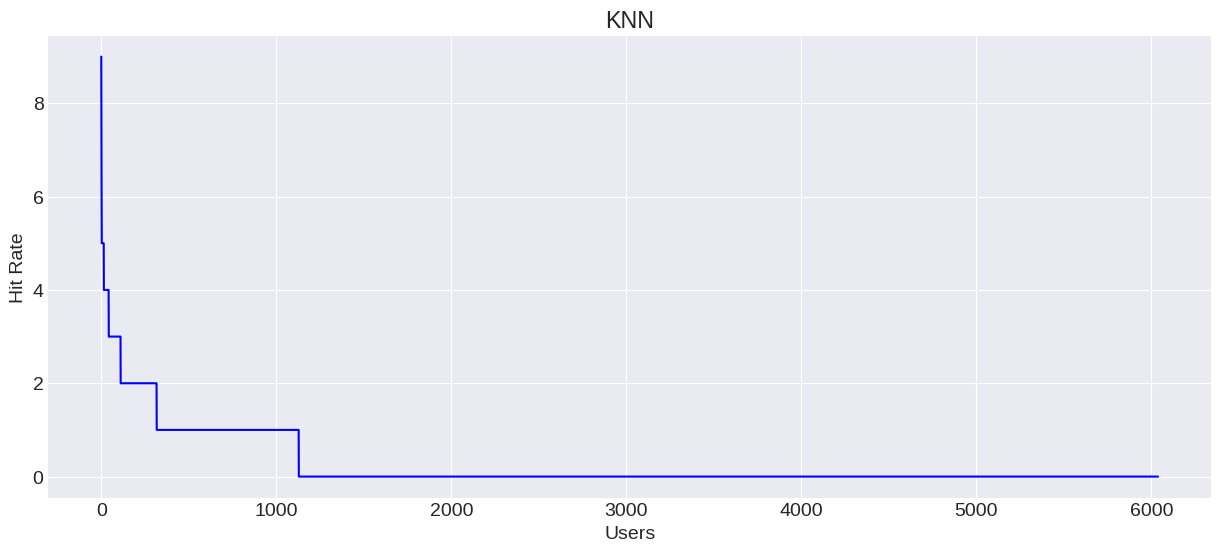

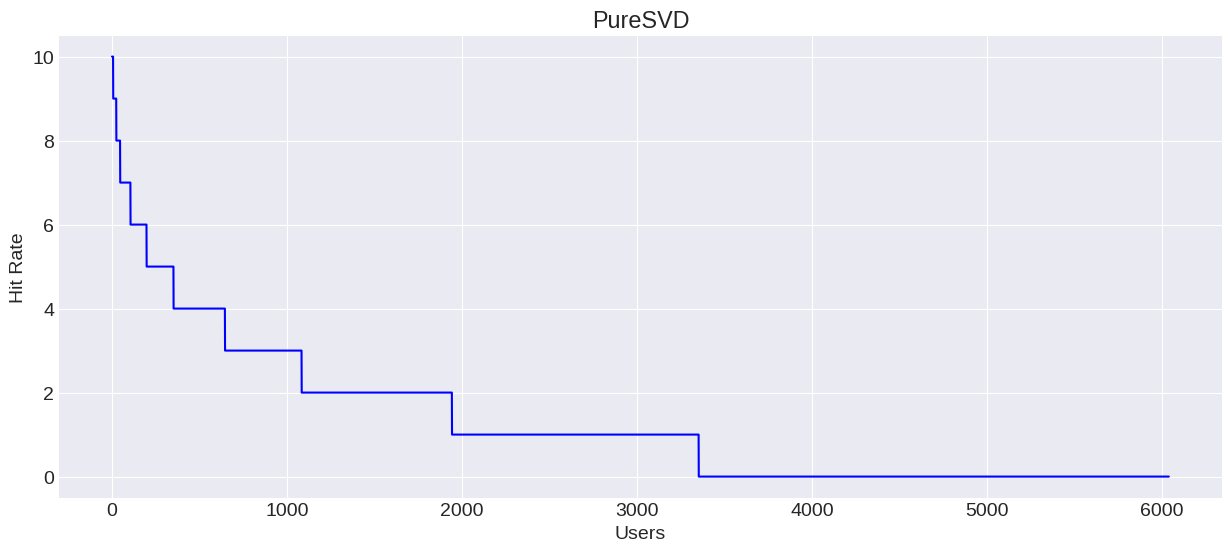

In [71]:
plotDistribution(list(hitRate_KNN.values()), "Users", "Hit Rate", "KNN")
plotDistribution(list(hitRate_SVD.values()), "Users", "Hit Rate", "PureSVD")

In [72]:
precision_KNN, recall_KNN = metric_precision_recall(users_targets, test_matrix, rec_KNN)
precision_SVD, recall_SVD = metric_precision_recall(users_targets, test_matrix, rec_PureSVD)

In [73]:
statisticInformation(list(precision_KNN.values()), "KNN")
statisticInformation(list(precision_SVD.values()), "PureSVD")

RS: KNN
	- Min: 0.0
	- Max: 0.5
	- Mean: 0.014619205298013247
	- Median: 0.0
	- STD: 0.04534475037006396
RS: PureSVD
	- Min: 0.0
	- Max: 1.0
	- Mean: 0.09827814569536424
	- Median: 0.0
	- STD: 0.14322566637703013


In [74]:
statisticInformation(list(recall_KNN.values()), "KNN")
statisticInformation(list(recall_SVD.values()), "PureSVD")

RS: KNN
	- Min: 0.0
	- Max: 1.0
	- Mean: 0.013143848897088504
	- Median: 0.0
	- STD: 0.05526768364931675
RS: PureSVD
	- Min: 0.0
	- Max: 1.0
	- Mean: 0.07907353453517718
	- Median: 0.0
	- STD: 0.1348399727729013


#Keras

In [106]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [107]:
df= Filmes_Avaliados

In [108]:
user_ids = df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df["rating"] = df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 6040, Number of Movies: 2514, Min rating: 1.0, Max rating: 5.0


In [109]:
df = df.sample(frac=1, random_state=42)
x = df[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
print(df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

977839


In [110]:
EMBEDDING_SIZE = 100
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)
model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [111]:
start = time.time()

In [112]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=3,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/3
13751/13751 [==============================] - 157s 11ms/step - loss: 0.6445 - accuracy: 0.2325 - val_loss: 0.6731 - val_accuracy: 0.2326
Epoch 2/3
13751/13751 [==============================] - 155s 11ms/step - loss: 0.7330 - accuracy: 0.2232 - val_loss: 0.7576 - val_accuracy: 0.2230
Epoch 3/3
13751/13751 [==============================] - 156s 11ms/step - loss: 0.8360 - accuracy: 0.2159 - val_loss: 0.8232 - val_accuracy: 0.2200


In [113]:
end = time.time()
print(end - start)

510.2274889945984


In [114]:
score = model.evaluate(x_val,y_val, verbose=0 )
accuracy= 100*score[1]
perda = 100*score[0]
print ('Test accuracy: %.4f%%' % accuracy)
print ('Test perda: %.4f%%' % perda)

Test accuracy: 23.1899%
Test perda: 72.5409%


Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

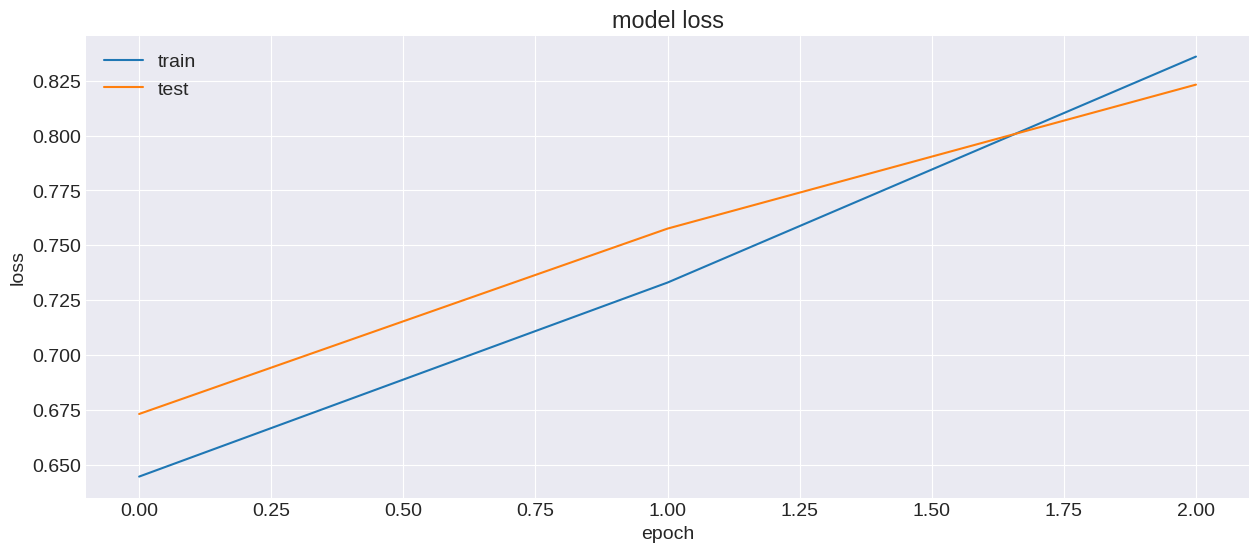

In [115]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [116]:
movie_df = df_movies

# Let us get a user and see the top recommendations.
user_id = df.userId.sample(1).iloc[0]
movies_watched_by_user = df[df.userId == user_id]
movies_not_watched = movie_df[
    ~movie_df["movieId"].isin(movies_watched_by_user.movieId.values)
]["movieId"]
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
)
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(10)
    .movieId.values
)
movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

60/60 [==============================] - 0s 2ms/step
Showing recommendations for user: 3929
Movies with high ratings from user
--------------------------------
Usual Suspects, The (1995) : Crime|Thriller
Crow, The (1994) : Action|Romance|Thriller
Blade Runner (1982) : Film-Noir|Sci-Fi
GoodFellas (1990) : Crime|Drama
Armageddon (1998) : Action|Adventure|Sci-Fi|Thriller
Saving Private Ryan (1998) : Action|Drama|War
Running Scared (1986) : Action|Comedy
Dogma (1999) : Comedy
Scrooged (1988) : Comedy
Big Trouble in Little China (1986) : Action|Comedy
--------------------------------
Top 10 movie recommendations
--------------------------------
Much Ado About Nothing (1993) : Comedy|Romance
Philadelphia (1993) : Drama
Remains of the Day, The (1993) : Drama
Hustler, The (1961) : Drama
Inherit the Wind (1960) : Drama
Dersu Uzala (1974) : Adventure|Drama
High Fidelity (2000) : Comedy
Midnight Express (1978) : Drama
Network (1976) : Comedy|Drama
Outlaw Josey Wales, The (1976) : Western
